In [1]:

import numpy as np
import pickle
import matplotlib.pyplot as plt


In [2]:
from functions_new import *


In [6]:
# assignment 1.1

def load(filename):
    data = load_batch(filename)
    
    X = data[b'data'].astype(np.float32).reshape(-1, 3072).T / 255
    y = np.array(data[b'labels']).astype(np.int32)
    
    Y = np.zeros((10, y.shape[0]), dtype=np.float32)
    for i, label in enumerate(y):
        Y[label, i] = 1
    
    return X, Y, y + 1

In [8]:
train_X, train_Y, train_y = load('data_batch_1')

val_X, val_Y, val_y = load('data_batch_2')

test_X, test_Y, test_y = load('Dataset/test_batch')

test_X


FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/data_batch_1'

In [ ]:
# assignment 1.2

def normalize_data(trainX, X):
    mean_X = np.mean(trainX, axis=1, keepdims=True)
    std_X = np.std(trainX, axis=1, keepdims=True)
    
    normalized_X = (X - mean_X) / std_X
    
    return normalized_X



In [ ]:
trainX_norm = normalize_data(train_X, train_X)
valX_norm = normalize_data(train_X, val_X)
testX_norm = normalize_data(train_X, test_X)

In [ ]:
#Assignment 1.3

def initialize_parameters(K, d):
    W = np.random.randn(K, d) * 0.01
    b = np.random.randn(K, 1) * 0.01
    return W, b

K = 10
d = trainX_norm.shape[0]
W, b = initialize_parameters(K, d)


In [ ]:
# Assignment 1.4

def EvaluateClassifier(X, W, b):
    s = np.dot(W, X) + b
    P = softmax(s)
    return P


In [ ]:
# Assignment 1.5

def ComputeCost(X, Y, W, b, lambda_):
    P = EvaluateClassifier(X, W, b)
    cross_entropy_loss = -np.mean(np.sum(Y * np.log(P), axis=0))
    regularization_term = lambda_ * np.sum(W**2)
    J = cross_entropy_loss + regularization_term
    return J



In [ ]:
# Assignment 1.6

def ComputeAccuracy(X, y, W, b):
    P = EvaluateClassifier(X, W, b)
    predictions = np.argmax(P, axis=0)
    correct_predictions = np.sum(predictions == (y - 1))
    acc = correct_predictions / y.shape[0]
    return acc

accuracy = ComputeAccuracy(trainX_norm, train_y, W, b)
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 10.67%


In [ ]:
# Assignment 1.7

def ComputeGradients(X, Y, P, W, lambda_):
    n = X.shape[1]
    g = P - Y
    grad_W = (1/n) * np.dot(g, X.T) + 2 * lambda_ * W
    grad_b = (1/n) * np.sum(g, axis=1).reshape(-1, 1)
    return grad_W, grad_b

# Select a small portion of the data
X_small = trainX_norm[:20, :1]
Y_small = train_Y[:, :1]
W_small = W[:, :20]
b_small = b
lambda_ = 0

# Compute the analytical gradients
P_small = EvaluateClassifier(X_small, W_small, b_small)
grad_W_analytical, grad_b_analytical = ComputeGradients(X_small, Y_small, P_small, W_small, lambda_)

# Compute the numerical gradients
grad_W_numerical, grad_b_numerical = ComputeGradsNumSlow(X_small, Y_small, P_small, W_small, b_small, lambda_, 1e-6)

# Compute the relative error
eps = 1e-10
relative_error_W = np.abs(grad_W_analytical - grad_W_numerical) / np.maximum(eps, np.abs(grad_W_analytical) + np.abs(grad_W_numerical))
relative_error_b = np.abs(grad_b_analytical - grad_b_numerical) / np.maximum(eps, np.abs(grad_b_analytical) + np.abs(grad_b_numerical))

print("Relative error W:", np.max(relative_error_W))
print("Relative error b:", np.max(relative_error_b))

Relative error W: 7.759458280072718e-07
Relative error b: 7.635972343496242e-10


In [ ]:
# Assignment 1.8

def MiniBatchGD(X, Y, GDparams, W, b, lambda_):
    n_batch, eta, n_epochs = GDparams
    n = X.shape[1]
    
    for epoch in range(n_epochs):
        for j in range(n // n_batch):
            j_start = j * n_batch
            j_end = (j + 1) * n_batch
            inds = slice(j_start, j_end)
            X_batch = X[:, inds]
            Y_batch = Y[:, inds]

            P_batch = EvaluateClassifier(X_batch, W, b)
            grad_W, grad_b = ComputeGradients(X_batch, Y_batch, P_batch, W, lambda_)

            W -= eta * grad_W
            b -= eta * grad_b
        
        # Compute and print the cost after each epoch
        J_train = ComputeCost(X, Y, W, b, lambda_)
        print(f"Epoch {epoch + 1}/{n_epochs}, training cost: {J_train}")

    return W, b

n_batch = 100
eta = 0.001
n_epochs = 40
lambda_ = 1

GDparams = (n_batch, eta, n_epochs)
W_star, b_star = MiniBatchGD(trainX_norm, train_Y, GDparams, W, b, lambda_)



Epoch 1/40, training cost: 4.027302718130363
Epoch 2/40, training cost: 3.298513869743587
Epoch 3/40, training cost: 2.8279448767042887
Epoch 4/40, training cost: 2.517975649123379
Epoch 5/40, training cost: 2.312468513360487
Epoch 6/40, training cost: 2.1758159929441643
Epoch 7/40, training cost: 2.084792880008535
Epoch 8/40, training cost: 2.024091358321933
Epoch 9/40, training cost: 1.983572377756982
Epoch 10/40, training cost: 1.9565019660540253
Epoch 11/40, training cost: 1.9383999646815344
Epoch 12/40, training cost: 1.926282204394786
Epoch 13/40, training cost: 1.9181593088066013
Epoch 14/40, training cost: 1.9127042491337078
Epoch 15/40, training cost: 1.9090314001891522
Epoch 16/40, training cost: 1.906549498634128
Epoch 17/40, training cost: 1.9048636865390125
Epoch 18/40, training cost: 1.9037102058287028
Epoch 19/40, training cost: 1.9029128354436713
Epoch 20/40, training cost: 1.902353819206728
Epoch 21/40, training cost: 1.901954457293735
Epoch 22/40, training cost: 1.901

In [ ]:
test_accuracy = ComputeAccuracy(testX_norm, test_y, W_star, b_star)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Test accuracy: 37.59%


In [ ]:
def load_all_batches(filenames):
    X, Y, y = [], [], []
    for filename in filenames:
        data = LoadBatch(filename)
        X.append(data[b'data'])
        Y.append(data[b'labels'])
        y.append(np.array(data[b'labels']).astype(np.int32))

    X = np.concatenate(X).astype(np.float32).T / 255
    Y = np.concatenate(Y).astype(np.int32)
    y = np.concatenate(y)

    Y_one_hot = np.zeros((10, Y.shape[0]), dtype=np.float32)
    for i, label in enumerate(Y):
        Y_one_hot[label, i] = 1

    return X, Y_one_hot, y + 1

In [ ]:
def create_validation_set(X, Y, y, val_size=1000):
    indices = np.random.permutation(X.shape[1])
    X_train, X_val = X[:, indices[val_size:]], X[:, indices[:val_size]]
    Y_train, Y_val = Y[:, indices[val_size:]], Y[:, indices[:val_size]]
    y_train, y_val = y[indices[val_size:]], y[indices[:val_size]]

    return (X_train, Y_train, y_train), (X_val, Y_val, y_val)

In [ ]:
# Load all batches
filenames = ["data_batch_1", "data_batch_2", "data_batch_3", "data_batch_4", "data_batch_5"]
X, Y, y = load_all_batches(filenames)

# Create a validation set
(X_train, Y_train, y_train), (X_val, Y_val, y_val) = create_validation_set(X, Y, y)


In [ ]:
def flip_images(X):
    def flip_image(image):
        image = image.reshape(3, 32, 32)
        flipped_image = np.flip(image, axis=2)
        return flipped_image.flatten()

    for i in range(X.shape[1]):
        if np.random.rand() < 0.5:
            X[:, i] = flip_image(X[:, i])

    return X

# Apply flipping to training data
X_train_flipped = flip_images(X_train.copy())


In [ ]:
# Define the hyperparameter search space
lambdas = [0, 0.1, 1]
learning_rates = [0.1, 0.01, 0.001]
batch_sizes = [50, 100, 200]

# Initialize variables to store the best hyperparameters and accuracy
best_lambda = None
best_learning_rate = None
best_batch_size = None
best_accuracy = 0


#print(X_train)

for lambda_ in lambdas:
    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            # Train the network with the current hyperparameters
            GDparams = (batch_size, learning_rate, n_epochs)
            W_star, b_star = MiniBatchGD(X_train_flipped, Y_train, GDparams, W, b, lambda_)
            
            # Compute the accuracy on the validation set
            accuracy = ComputeAccuracy(X_val, y_val, W_star, b_star)

            # Check if the current hyperparameters result in a better accuracy
            if accuracy > best_accuracy:
                best_lambda = lambda_
                best_learning_rate = learning_rate
                best_batch_size = batch_size
                best_accuracy = accuracy

            print(f"Lambda: {lambda_}, Learning rate: {learning_rate}, Batch size: {batch_size}, Accuracy: {accuracy}")

# Print the best hyperparameters and accuracy
print(f"Best hyperparameters: Lambda = {best_lambda}, Learning rate = {best_learning_rate}, Batch size = {best_batch_size}")
print(f"Best validation accuracy: {best_accuracy}")

Epoch 1/40, training cost: 13.201463688484251
Epoch 2/40, training cost: 15.184315180889552
Epoch 3/40, training cost: 13.194529726098622
Epoch 4/40, training cost: 12.590368703883353
Epoch 5/40, training cost: 8.513014456471517
Epoch 6/40, training cost: 6.997817052786829
Epoch 7/40, training cost: 7.167558149495766
Epoch 8/40, training cost: 15.711648530386253
Epoch 9/40, training cost: 10.669743967480938
Epoch 10/40, training cost: 11.94975275734555
Epoch 11/40, training cost: 7.49382174480817
Epoch 12/40, training cost: 11.082051392416007
Epoch 13/40, training cost: 11.424474655545536
Epoch 14/40, training cost: 10.655077456149055
Epoch 15/40, training cost: 13.068094791212937
Epoch 16/40, training cost: 8.45653580844914
Epoch 17/40, training cost: 11.039278711863114
Epoch 18/40, training cost: 8.116070631496907
Epoch 19/40, training cost: 9.307016738979698
Epoch 20/40, training cost: 9.525040065803221
Epoch 21/40, training cost: 8.455196098322462
Epoch 22/40, training cost: 12.753

In [ ]:
# without flipped images
#Best hyperparameters: Lambda = 0.1, Learning rate = 0.001, Batch size = 200
#Best validation accuracy: 0.401

# with flipped images
# Best hyperparameters: Lambda = 0.1, Learning rate = 0.001, Batch size = 100
# Best validation accuracy: 0.362


In [ ]:
def MiniBatchGD2(X, Y, GDparams, W, b, lambda_):
    n_batch, eta, n_epochs = GDparams
    n = X.shape[1]
    
    for epoch in range(n_epochs):
        for j in range(n // n_batch):
            j_start = j * n_batch
            j_end = (j + 1) * n_batch
            inds = slice(j_start, j_end)
            X_batch = X[:, inds]
            Y_batch = Y[:, inds]

            P_batch = EvaluateClassifier(X_batch, W, b)
            grad_W, grad_b = ComputeGradients(X_batch, Y_batch, P_batch, W, lambda_)

            W -= eta * grad_W
            b -= eta * grad_b
        
        # Compute and print the cost after each epoch
        J_train = ComputeCost(X, Y, W, b, lambda_)
        print(f"Epoch {epoch + 1}/{n_epochs}, training cost: {J_train}")

    return W, b

n_batch = 200
eta = 0.001
n_epochs = 40
lambda_ = 0.1

GDparams = (n_batch, eta, n_epochs)
W_star, b_star = MiniBatchGD(train_X, train_Y, GDparams, W, b, lambda_)

test_accuracy = ComputeAccuracy(test_X, test_y, W_star, b_star)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/40, training cost: 2.07742390679877
Epoch 2/40, training cost: 2.0677108591088382
Epoch 3/40, training cost: 2.0590625360696904
Epoch 4/40, training cost: 2.0513243342766625
Epoch 5/40, training cost: 2.0443597924016492
Epoch 6/40, training cost: 2.0380579802236896
Epoch 7/40, training cost: 2.032328223833706
Epoch 8/40, training cost: 2.027095779445141
Epoch 9/40, training cost: 2.022298534485571
Epoch 10/40, training cost: 2.0178844775317093
Epoch 11/40, training cost: 2.0138097408143385
Epoch 12/40, training cost: 2.0100370726735717
Epoch 13/40, training cost: 2.0065346357272986
Epoch 14/40, training cost: 2.003275053922949
Epoch 15/40, training cost: 2.0002346513517693
Epoch 16/40, training cost: 1.9973928399924978
Epoch 17/40, training cost: 1.9947316239955426
Epoch 18/40, training cost: 1.992235195817816
Epoch 19/40, training cost: 1.9898896052410315
Epoch 20/40, training cost: 1.9876824865944955
Epoch 21/40, training cost: 1.9856028327420712
Epoch 22/40, training cost: 1

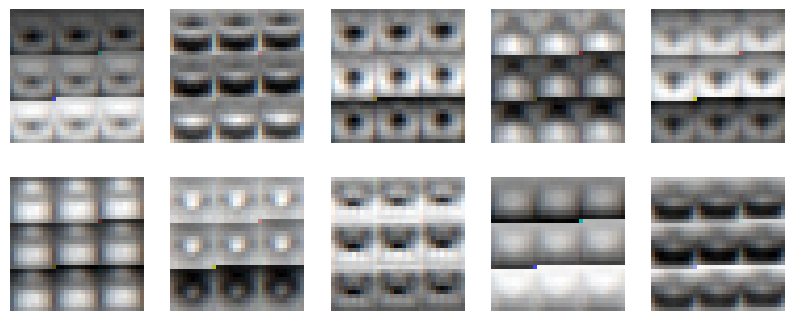

In [ ]:
import matplotlib.pyplot as plt

templates = []
for i in range(10):
    im = W_star[i].reshape(32, 32, 3)
    im = (im - im.min()) / (im.max() - im.min())
    templates.append(im)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(templates[i])
    ax.axis('off')
plt.show()